In [1]:
import random as rd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
import statistics as stat
import math
from math import *
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math

from sklearn.linear_model import LinearRegression

In [2]:
mean1=[2.3,2]
mean2=[0.8,0]
cov1=[[2,-0.8],[-0.8,2]]
cov2=[[1,0],[0,4]] 
group1=np.random.multivariate_normal(mean1, cov1, 200)
group2=np.random.multivariate_normal(mean2, cov2, 200)

In [3]:
Y1=[1 for i in range(200)]
Y2=[0 for i in range (200)]
Y=Y1+Y2
Y=np.array(Y)

In [4]:
X=np.concatenate((group1,group2),axis=0)
X1=np.c_[X,Y]
X2=X1
np.random.shuffle(X1)
np.random.shuffle(X)
np.random.shuffle(Y)


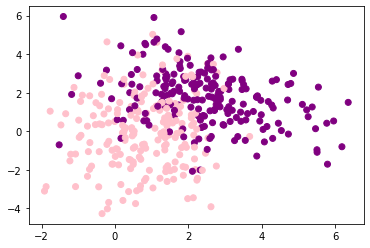

In [5]:

color = ['pink' if y==0 else 'purple' for y in X1[:,2]]
plt.scatter(X1[:,0],X1[:,1] , c=color)

In [6]:
x1=X[:,0]
x2=X[:,1]
x1_min, x1_max=min(x1), max(x1)
x2_min, x2_max=min(x2), max(x2)
Neval=15;h1=(x1_max-x1_min)/Neval;h2=(x2_max-x2_min)/Neval
x1Eval, x2Eval=np.meshgrid(np.arange(x1_min, x1_max, h1), np.arange(x2_min, x2_max, h2))

Text(0, 0.5, 'x2')

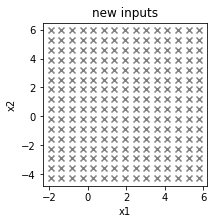

In [7]:
figure = plt.figure(figsize=(10,3))
ax=plt.subplot(1,3,1)
ax.scatter(x1Eval,x2Eval,c="gray",marker="x")
ax.set_title("new inputs")
ax.set_xlabel('x1')
ax.set_ylabel('x2')



# classification decision trees

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

tree1=tree.DecisionTreeClassifier(min_samples_leaf=25)#min_samples_leaf PLUS C4EST GRAND 
#ET PLUS L"accuracy ets elevé  mais flemme si c'est eg&le a 1 tu a avoi un grand arble avce  cacuracy 1

tree1=tree1.fit(X, Y)
pY_train=tree1.predict_proba(X);
predxclass=np.argmax(pY_train,axis=1);
#print(predxclass)
#Accuracy
E_train=(Y==predxclass).sum()/len(Y)
E_train

0.6425

In [9]:
from sklearn.tree import export_text
r=export_text(tree1);print(r)

|--- feature_0 <= -0.56
|   |--- class: 1
|--- feature_0 >  -0.56
|   |--- feature_0 <= 2.97
|   |   |--- feature_0 <= 2.08
|   |   |   |--- feature_0 <= 1.81
|   |   |   |   |--- feature_1 <= -1.46
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  -1.46
|   |   |   |   |   |--- feature_0 <= 1.56
|   |   |   |   |   |   |--- feature_0 <= 1.27
|   |   |   |   |   |   |   |--- feature_0 <= 0.72
|   |   |   |   |   |   |   |   |--- feature_1 <= 1.08
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_1 >  1.08
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  0.72
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  1.27
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  1.56
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  1.81
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  2.08
|   |   |   |

[Text(203.27142857142857, 206.56799999999998, 'X[0] <= -0.56\ngini = 0.5\nsamples = 400\nvalue = [200, 200]'),
 Text(179.35714285714286, 184.824, 'gini = 0.444\nsamples = 27\nvalue = [9, 18]'),
 Text(227.18571428571428, 184.824, 'X[0] <= 2.97\ngini = 0.5\nsamples = 373\nvalue = [191, 182]'),
 Text(167.4, 163.07999999999998, 'X[0] <= 2.083\ngini = 0.497\nsamples = 308\nvalue = [165, 143]'),
 Text(119.57142857142857, 141.336, 'X[0] <= 1.81\ngini = 0.5\nsamples = 227\nvalue = [115, 112]'),
 Text(95.65714285714286, 119.592, 'X[1] <= -1.46\ngini = 0.498\nsamples = 202\nvalue = [108, 94]'),
 Text(71.74285714285715, 97.848, 'gini = 0.469\nsamples = 32\nvalue = [12, 20]'),
 Text(119.57142857142857, 97.848, 'X[0] <= 1.556\ngini = 0.492\nsamples = 170\nvalue = [96, 74]'),
 Text(95.65714285714286, 76.10399999999998, 'X[0] <= 1.269\ngini = 0.498\nsamples = 145\nvalue = [77, 68]'),
 Text(71.74285714285715, 54.360000000000014, 'X[0] <= 0.722\ngini = 0.481\nsamples = 107\nvalue = [64, 43]'),
 Text(47

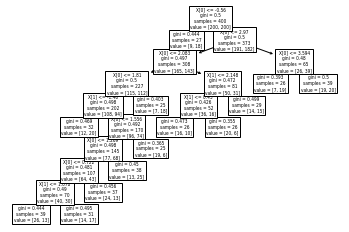

In [10]:
tree.plot_tree(tree1)

# score and decision boundaries 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4,colors=['pink','green','blue','pink'])
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

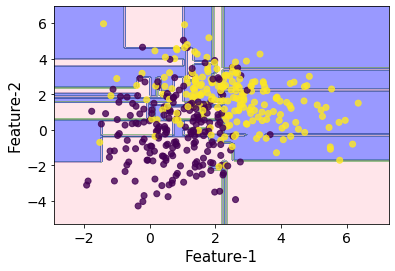

In [12]:
Y=X1[:,2]
x1=X1[:,0]
x2=X1[:,1]
X=np.c_[x1,x2]
plt.figure()
plt.title("",fontsize=16)
plot_decision_boundaries(X,X1[:,2],DecisionTreeClassifier)
plt.show()

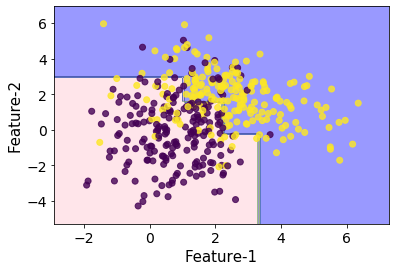

In [13]:
Y=X1[:,2]
x1=X1[:,0]
x2=X1[:,1]
X=np.c_[x1,x2]
plt.figure()
plt.title("",fontsize=16)
plot_decision_boundaries(X,X1[:,2],DecisionTreeClassifier,min_samples_leaf=10,min_samples_split=20)
plt.show()

the meta parameter of the decison trees are the min sample leafs min_samples_split default=2
The minimum number of samples required to split an internal node:

 min_samples_leaf  default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

# bagging 

In [14]:
#Bagging
y=Y
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import BaggingClassifier
treemod=tree.DecisionTreeClassifier()
bagmod=BaggingClassifier(base_estimator=treemod, n_estimators=10, random_state=0)
treemodfit=treemod.fit(X, y);
bagmodfit=bagmod.fit(X, y);
pY_train=bagmodfit.predict_proba(X);
#Score and decision  on the training set
predxclass=np.argmax(pY_train,axis=1);
#print(predxclass)


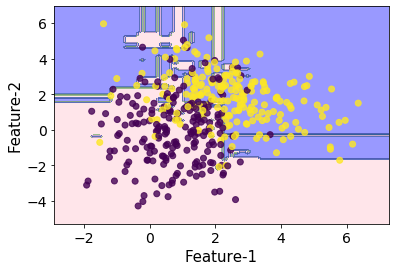

In [15]:
Y=X1[:,2]
x1=X1[:,0]
x2=X1[:,1]
X=np.c_[x1,x2]
plt.figure()
plt.title("",fontsize=16)
plot_decision_boundaries(X,X1[:,2],BaggingClassifier,base_estimator=treemod, n_estimators=10, random_state=0)
plt.show()

# random forest

In [16]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
#tree = tree.DecisionTreeClassifier()
RF=RandomForestClassifier(max_depth=2, random_state=0)
RFfit=RF.fit(X, Y);
pY_train=RFfit.predict_proba(X);#Score and decision computation on the training setpredxclass=np.argmax(pY_train,axis=1);#print(predcla

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


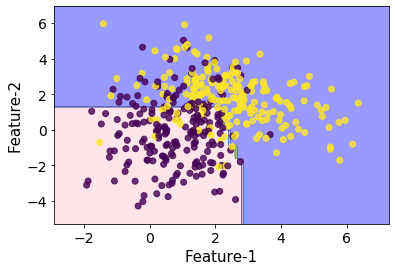

In [17]:
import warnings
warnings.filterwarnings('ignore')

Y=X1[:,2]
x1=X1[:,0]
x2=X1[:,1]
X=np.c_[x1,x2]
plt.figure()
plt.title("",fontsize=16)
plot_decision_boundaries(X,X1[:,2],RandomForestClassifier,max_depth=2, random_state=0)
plt.show()

max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

# baggin and random forest  
#tirage uniforme de k features 
#parmis a chaqu noeud il ya des algos ou 
#la valeur par defaut c'est p/3 d'autre racinde de 
#p et on fait le choix a chaque noeux 

les foret aleatoir ne marche pas dutout quand linformation est tenu dans une petite partie de vairable qui sont noye dans plein de trucs non informatif parcontre le bagging lui il va bien marche 

# application heart disease

In [18]:
#Application SA Heart
####################################
import pandas as pd
import numpy as np
tab=pd.read_csv('SAheart.txt')#print(tab)
np.shape(tab)

(462, 11)

In [40]:
Y=tab["chd"]
#dans tab il y'a des variables explicativs qui ne
#sont pas des variables quantitative et donc impossible d'utiliser les truc 
# de base donc on prend que les quantitatuves
Xnum=tab.loc[:,['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']]
X=Xnum.to_numpy()

In [20]:
#splitting into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [21]:
#decision tree classification
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#let's tune the meta parameter 
#first max depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, Y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    


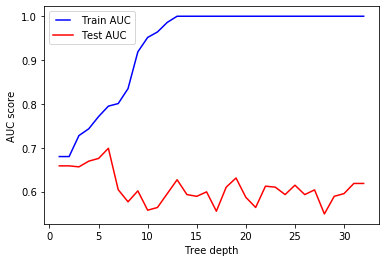

In [22]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

In [23]:
md=max_depths[np.array(test_results).argmax()]

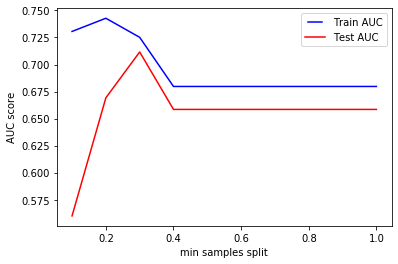

In [24]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train, Y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [25]:
mss=min_samples_splits[np.array(test_results).argmax()]

In [26]:
# min sample leafs

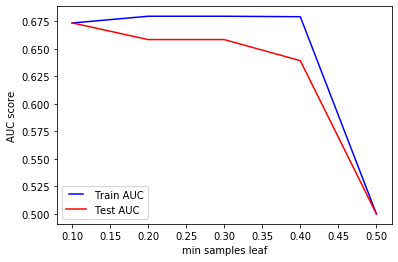

In [27]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, Y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()
msl=min_samples_leafs[np.array(test_results).argmax()]

In [28]:
msl

0.1

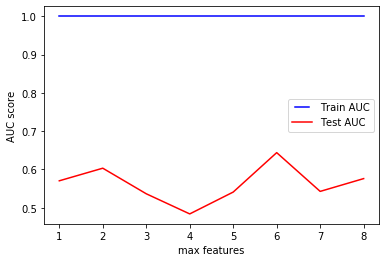

In [29]:
#max feature
train=np.c_[X_train,Y_train]
max_features = list(range(1,train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(X_train, Y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()
#pas tres relevant
# c'est ce que la prof m'a explique la on voit que
#le parametre max feature n'est pas tres relevant il n'a pas d'effet sur le model 

Accuracy: 0.7096774193548387


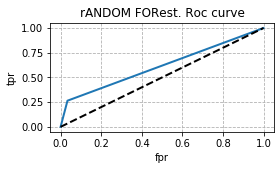

In [64]:
tree1=tree.DecisionTreeClassifier(min_samples_leaf=msl,min_samples_split=mss,max_depth=md)#min_samples_leaf PLUS C4EST GRAND 
#ET PLUS L"accuracy ets elevé  mais flemme si c'est eg&le a 1 tu a avoi un grand arble avce  cacuracy 1

tree1=tree1.fit(X_train, Y_train)
pY_test=tree1.predict_proba(X_test);
predxclass=np.argmax(pY_test,axis=1);
y_pred=tree1.predict(X_test)
#print(predxclass)
#Accuracy
#E_train=(Y_test==predxclass).sum()/len(Y_test)
#E_train
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
fpr, tpr, thresholds=metrics.roc_curve(Y_test, y_pred)
figure=plt.figure(figsize=(4,2))
plt.plot(fpr,tpr, linewidth=2)
plt.title('decision tree. Roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth=2)
plt.grid(linestyle='dashed')
plt.show()

In [65]:
# example of grid searching key hyperparameters for BaggingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
X=X_train
y=Y_train
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.656730 using {'n_estimators': 100}
0.652213 (0.052733) with: {'n_estimators': 10}
0.656730 (0.043548) with: {'n_estimators': 100}
0.652213 (0.061823) with: {'n_estimators': 1000}


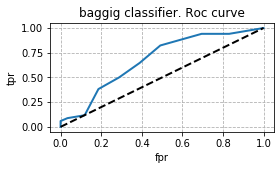

In [66]:
#Bagging 
#Bagging
y=Y
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import BaggingClassifier
treemod=tree.DecisionTreeClassifier()
bagmod=BaggingClassifier(base_estimator=treemod, n_estimators=10, random_state=0)
treemodfit=treemod.fit(X_train, Y_train);
bagmodfit=bagmod.fit(X_train, Y_train);
pY_test=bagmodfit.predict_proba(X_test);
#Score and decision  on the training set
predxclass=np.argmax(pY_test,axis=1);
#print(predxclass)
#Accuracy
E_train=(Y_test==predxclass).sum()/len(Y_test)
E_train
fpr, tpr, thresholds=metrics.roc_curve(Y_test, pY_test[:,1])
figure=plt.figure(figsize=(4,2))
plt.plot(fpr,tpr, linewidth=2)
plt.title('baggig classifier. Roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth=2)
plt.grid(linestyle='dashed')
plt.show()

In [67]:
#Random forest 

# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
X=X_train
y=Y_train
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000,500,34]
max_features = ['sqrt', 'log2']
max_depths=[2,5,45,6,8]
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depths)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
   # print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.696477 using {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 500}


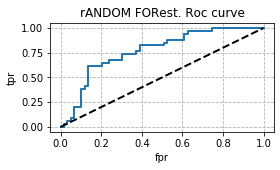

In [68]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
#tree = tree.DecisionTreeClassifier()
RF=RandomForestClassifier(max_depth=2, random_state=0,max_features= 'log2',n_estimators=500)
RFfit=RF.fit(X_train, Y_train);
pY_test=RFfit.predict_proba(X_test);#Score and decision computation on the training set
predxclass=np.argmax(pY_test,axis=1);#print(predcla
E_train=(Y_test==predxclass).sum()/len(Y_test)
E_train
fpr, tpr, thresholds=metrics.roc_curve(Y_test, pY_test[:,1])
figure=plt.figure(figsize=(4,2))
plt.plot(fpr,tpr, linewidth=2)
plt.title('rANDOM FORest. Roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth=2)
plt.grid(linestyle='dashed')
plt.show()

In [37]:
#cross validation pour comparer les 3 
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [50]:
Y=tab["chd"]
#dans tab il y'a des variables explicativs qui ne
#sont pas des variables quantitative et donc impossible d'utiliser les truc 
# de base donc on prend que les quantitatuves
Xnum=tab.loc[:,['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']]
X=Xnum.to_numpy()

In [56]:
kfold = model_selection.KFold(n_splits=20)
model_kfold = RandomForestClassifier(max_depth=2, random_state=0,max_features= 'log2',n_estimators=500)
acc_forest = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold,scoring= 'accuracy')
#print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

In [57]:
kfold = model_selection.KFold(n_splits=20)
treemod=tree.DecisionTreeClassifier()
model_kfold = BaggingClassifier(base_estimator=treemod, n_estimators=10, random_state=0)
acc_bagging = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold,scoring= 'accuracy')
#print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

In [58]:
kfold = model_selection.KFold(n_splits=20)
model_kfold = tree.DecisionTreeClassifier(min_samples_leaf=msl,min_samples_split=mss,max_depth=md)
acc_tree = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold,scoring= 'accuracy')
#print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

array([0.55319149, 0.72340426, 0.67391304, 0.7173913 , 0.54347826,
       0.69565217, 0.73913043, 0.7173913 , 0.73913043, 0.7826087 ])

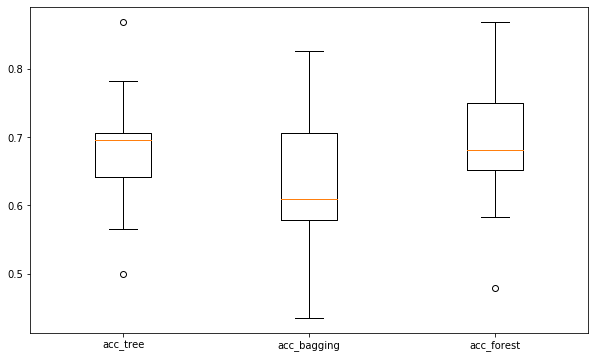

In [59]:
plt.figure(figsize=(10,6))
plt.boxplot((acc_tree, acc_bagging, acc_forest), sym="o",labels=["acc_tree", "acc_bagging","acc_forest"])
plt.show()

In [ ]:
# lequel des 3 est mieux ? je dirais le decision treee 
#ou le forest mais comment decider entre les deuX


According to these   id said random forest is the best model here 

#  il faut normaliser avant de penaliser sinon on va creer un biais